## Applying pyspark

In [1]:
# install pyspark
#!pip install pyspark

In [2]:
import sys

print("Python Version:", sys.version)
print("Virtual Environment Path:", sys.prefix)

Python Version: 3.11.6 (main, Oct  8 2023, 05:06:43) [GCC 13.2.0]
Virtual Environment Path: /usr


In [3]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [4]:
import warnings
warnings.filterwarnings("ignore")

 <h3>Comands to start using hadoop:</h3>


<ul style="list-style-type: none;">
  <li>start-dfs.sh</li>
  <li>start-yarn.sh</li>
</ul>

 <h3>command to stop the process:</h3>

<ul style="list-style-type: none;">
  <li>stop-dfs.sh </li>
  <li>stop-yarn.sh</li>
</ul>

In [5]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Read CSV from HDFS") \
    .getOrCreate()

# Relative Path in HDFS
# csv_file_path = "/first_CA_second_sem/TSM10.20240320205332.csv"

csv_file_path = "hdfs://localhost:9000/first_CA_second_sem/TSM10.20240320205332.csv"

# Read the CSV file into a DataFrame
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)



24/04/04 20:55:30 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [6]:
default_fs = spark._jsc.hadoopConfiguration().get("fs.defaultFS")

In [7]:
print("default_fs path is: ", default_fs)

default_fs path is:  hdfs://localhost:9000


In [8]:
# Show the DataFrame
df.show(5)

+---------+----------------+---------+------------+------------+--------------------+------------+---------+-------------+------+
|STATISTIC| Statistic Label|TLIST(M1)|       Month|C02487V03011|     Commodity group|C03409V04104|  Country|         UNIT| VALUE|
+---------+----------------+---------+------------+------------+--------------------+------------+---------+-------------+------+
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|          AT|  Austria|Euro Thousand| 15321|
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|          AU|Australia|Euro Thousand|  5064|
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|          BE|  Belgium|Euro Thousand|109964|
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|          BG| Bulgaria|Euro Thousand| 33988|
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|     

In [9]:
type(df)

pyspark.sql.dataframe.DataFrame

In [10]:
df.printSchema()

root
 |-- STATISTIC: string (nullable = true)
 |-- Statistic Label: string (nullable = true)
 |-- TLIST(M1): integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- C02487V03011: integer (nullable = true)
 |-- Commodity group: string (nullable = true)
 |-- C03409V04104: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- UNIT: string (nullable = true)
 |-- VALUE: integer (nullable = true)



In [11]:
df.columns

['STATISTIC',
 'Statistic Label',
 'TLIST(M1)',
 'Month',
 'C02487V03011',
 'Commodity group',
 'C03409V04104',
 'Country',
 'UNIT',
 'VALUE']

In [12]:
# Get statistical summary of the DataFrame
df.describe().show(5)


24/04/04 20:55:40 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+---------+----------------+------------------+------------+-----------------+--------------------+------------+---------+-------------+-----------------+
|summary|STATISTIC| Statistic Label|         TLIST(M1)|       Month|     C02487V03011|     Commodity group|C03409V04104|  Country|         UNIT|            VALUE|
+-------+---------+----------------+------------------+------------+-----------------+--------------------+------------+---------+-------------+-----------------+
|  count|   705012|          705012|            705012|      705012|           705012|              705012|      705012|   705012|       705012|           496279|
|   mean|     null|            null| 201911.0366972477|        null|5051.712121212121|                null|        null|     null|         null|9231.518990326007|
| stddev|     null|            null|261.32310506497976|        null|2875.646182107541|                null|        null|     null|         null|91717.59880938345|
|    min| TSM10C01|Val

In [13]:
# selecting columns with spark method
selected_df = df.select('Month', "Commodity group", "VALUE")


In [14]:
selected_df.show(5)


+------------+--------------------+------+
|       Month|     Commodity group| VALUE|
+------------+--------------------+------+
|2015 January|Total merchandise...| 15321|
|2015 January|Total merchandise...|  5064|
|2015 January|Total merchandise...|109964|
|2015 January|Total merchandise...| 33988|
|2015 January|Total merchandise...| 12169|
+------------+--------------------+------+
only showing top 5 rows



In [15]:
# Create a temporary view using the DataFrame
df.createOrReplaceTempView("commodity_data")

In [16]:
# Getting a list of table names
table_names = spark.catalog.listTables()

print("table names: ", table_names)

table names:  [Table(name='commodity_data', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [50]:
# Write and execute the SQL query
sql_query = """
SELECT `Month`, `Commodity group`, VALUE
FROM commodity_data
WHERE `Commodity group` = 'Chemical materials and products, n.e.s. (59)'
AND Country = 'USA'
"""

sql_query_gb = """
SELECT `Month`, `Commodity group`, VALUE
FROM commodity_data
WHERE `Commodity group` = 'Chemical materials and products, n.e.s. (59)'
AND Country = 'Great Britain'
"""

result_df = spark.sql(sql_query)
result_df_gb = spark.sql(sql_query_gb)

# Show the last 5 rows of the result DataFrame
result_df.show(5)

+-------------+--------------------+-----+
|        Month|     Commodity group|VALUE|
+-------------+--------------------+-----+
| 2015 January|Chemical material...|11176|
|2015 February|Chemical material...|12978|
|   2015 March|Chemical material...|16084|
|   2015 April|Chemical material...|13355|
|     2015 May|Chemical material...|14691|
+-------------+--------------------+-----+
only showing top 5 rows



In [51]:
# print gb dataset
result_df_gb.show(5)

+-------------+--------------------+-----+
|        Month|     Commodity group|VALUE|
+-------------+--------------------+-----+
| 2015 January|Chemical material...|16636|
|2015 February|Chemical material...|18627|
|   2015 March|Chemical material...|20372|
|   2015 April|Chemical material...|22223|
|     2015 May|Chemical material...|21127|
+-------------+--------------------+-----+
only showing top 5 rows



In [19]:
total_rows = result_df.count()
print("Total rows in VALUE column:", total_rows)

Total rows in VALUE column: 218


In [53]:
# count rows in gb dataset
print("Total rows in the british dataset:", result_df_gb.count())

Total rows in the british dataset: 218


In [55]:
# Check for null values in the DataFrame
def check_null_values(dataset):
    null_count = dataset.filter(result_df.VALUE.isNull()).count()

    if null_count > 0:
        print("There are empty values in the 'VALUE' column.")
    else:
        print("There are no empty values in the 'VALUE' column.")

# check empty values in the american dataset
check_null_values(result_df)

There are no empty values in the 'VALUE' column.


In [57]:
# check empty values in the british dataset
check_null_values(result_df_gb)

There are no empty values in the 'VALUE' column.


In [58]:
import plotly.express as px

# Convert Spark DataFrame to Pandas DataFrame
def draw_plot(dataset):
    pandas_df = dataset.toPandas()

    # Create an interactive line plot
    fig = px.line(pandas_df, x='Month', y='VALUE', title='Time Series of VALUE',
                  labels={'Month': 'Month', 'VALUE': 'VALUE'})

    # Show just the values of the "VALUE" column
    fig.update_traces(mode='markers+lines', line=dict(color='blue', width=2))

    # Disable engineering notation for y-axis tick labels
    fig.update_yaxes(tickformat=',.0f')  # This format will display integer values without any decimal places

    # Show the plot
    fig.show()

# showing american dataset
draw_plot(result_df)

In [59]:
#showing british dataset
draw_plot(result_df_gb)

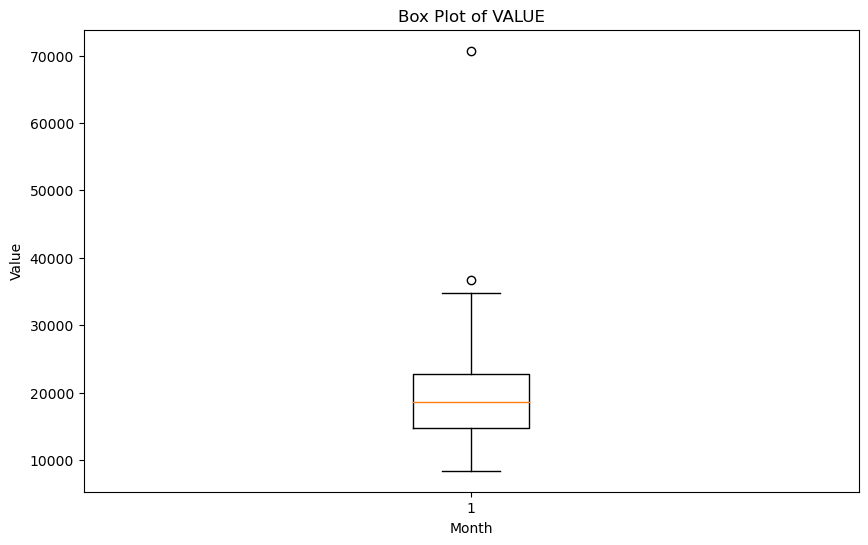

In [60]:
import matplotlib.pyplot as plt

# Box plot of the column "VALUE"
def show_box_plot(dataset):
    values = dataset.select("VALUE").rdd.flatMap(lambda x: x).collect()

    # Plotting the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(values)
    plt.title('Box Plot of VALUE')
    plt.ylabel('Value')
    plt.xlabel('Month')
    plt.show()
    
#box plot of american dataset
show_box_plot(result_df)

In [23]:
# show statistics metrics
result_df.describe("VALUE").show()

+-------+-----------------+
|summary|            VALUE|
+-------+-----------------+
|  count|              218|
|   mean|19562.72018348624|
| stddev|6753.789771393583|
|    min|             8398|
|    max|            70713|
+-------+-----------------+



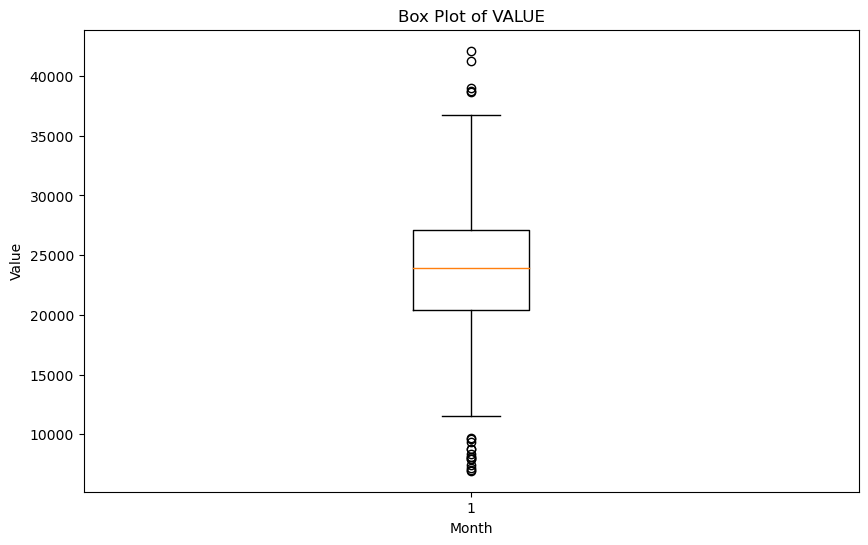

In [61]:
#box plot of american dataset
show_box_plot(result_df_gb)

In [63]:
# show statistics metrics of british dataset
result_df_gb.describe("VALUE").show()

+-------+------------------+
|summary|             VALUE|
+-------+------------------+
|  count|               218|
|   mean|23618.261467889908|
| stddev| 6509.325750332842|
|    min|              6949|
|    max|             42119|
+-------+------------------+



In [24]:
#!pip install tensorflow
# As tensorflow it got some troubles to installing because of the "error: externally-managed-environment"
#another solution is the use of pytorch library

In [25]:
# check installed libraries
#!pip list

In [26]:
#!pip install torch

In [27]:
# Drop empty values in the "VALUE" column
dropped_df = result_df.dropna(subset=['VALUE'])

# Show the last 5 rows of the result DataFrame
dropped_df.show(5)


+-------------+--------------------+-----+
|        Month|     Commodity group|VALUE|
+-------------+--------------------+-----+
| 2015 January|Chemical material...|11176|
|2015 February|Chemical material...|12978|
|   2015 March|Chemical material...|16084|
|   2015 April|Chemical material...|13355|
|     2015 May|Chemical material...|14691|
+-------------+--------------------+-----+
only showing top 5 rows



In [28]:
result_df.count()

218

In [30]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler


# Vector Assembler to convert features to a single vector column
vecAssembler = VectorAssembler(inputCols=["VALUE"], outputCol="features")
df_new = vecAssembler.transform(result_df).select("features")

In [31]:
print(df_new)

DataFrame[features: vector]


In [32]:
# Convert Spark DataFrame to RDD and then to NumPy array
data_array = np.array(df_new.rdd.map(lambda x: x.features[0]).collect())

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_array.reshape(-1, 1))

In [33]:
# Define a function to create sequences for input/output
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [34]:
# Define sequence length and split data into training and testing sets
sequence_length = 10
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

In [35]:
# Create sequences for training and testing sets
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [36]:
# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train).unsqueeze(2)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test).unsqueeze(2)
y_test = torch.Tensor(y_test)

In [37]:
# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [38]:
# Instantiate the model, define loss function and optimizer
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [39]:
# Train the model
epochs = 150
for i in range(epochs):
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 0:
        print(f'Epoch: {i:3} loss: {single_loss.item():10.8f}')


Epoch:   0 loss: 0.00010152
Epoch:  25 loss: 0.00091692
Epoch:  50 loss: 0.00009280
Epoch:  75 loss: 0.02052079
Epoch: 100 loss: 0.00448699
Epoch: 125 loss: 0.00792912


In [40]:
# Test the model
test_losses = []
with torch.no_grad():
    for seq, labels in zip(X_test, y_test):
        y_pred = model(seq)
        test_loss = loss_function(y_pred, labels)
        test_losses.append(test_loss.item())

# MSE Mean Squared Error (MSE) after training the model         
print(f'Average Test Loss, MSE: {np.mean(test_losses):10.8f}')


Average Test Loss, MSE: 0.02744333


In [41]:
# Make predictions
predictions = []
with torch.no_grad():
    for seq in X_test:
        predictions.append(model(seq).item())


In [42]:
# Inverse transform the predictions
predicted_values = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

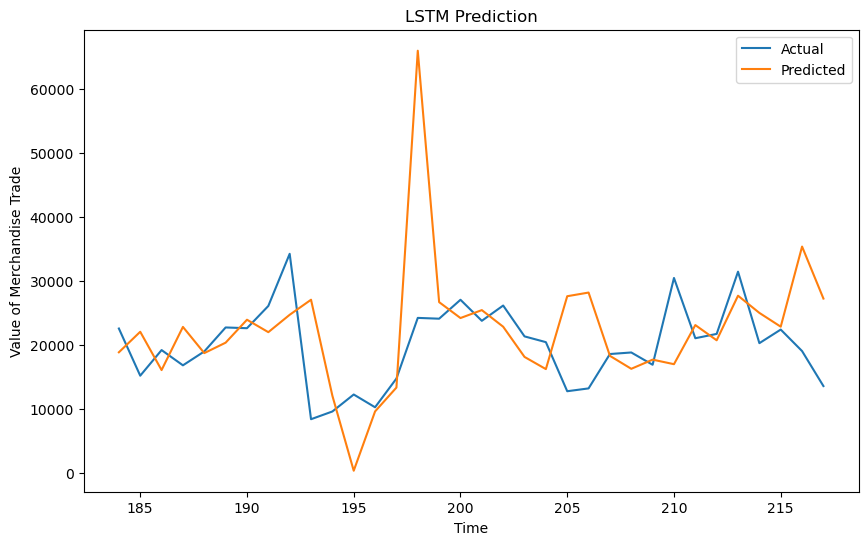

In [43]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(data_array) - len(predicted_values), len(data_array)), data_array[-len(predicted_values):], label='Actual')
plt.plot(range(len(data_array) - len(predicted_values), len(data_array)), predicted_values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value of Merchandise Trade')
plt.title('LSTM Prediction')
plt.legend()
plt.show()


In [44]:
import torch
import torch.nn as nn
import numpy as np

# Define the GRU model
class GRU(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.gru = nn.GRU(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = torch.zeros(1, 1, self.hidden_layer_size)

    def forward(self, input_seq):
        gru_out, self.hidden_cell = self.gru(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(gru_out.view(len(input_seq), -1))
        return predictions[-1]

# Instantiate the model, define loss function and optimizer
model_gru = GRU()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model_gru.parameters(), lr=0.001)

# Train the model
epochs = 150
for i in range(epochs):
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        model_gru.hidden_cell = torch.zeros(1, 1, model_gru.hidden_layer_size)

        y_pred = model_gru(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i % 25 == 0:
        print(f'Epoch: {i:3} loss: {single_loss.item():10.8f}')

Epoch:   0 loss: 0.00081888
Epoch:  25 loss: 0.00068600
Epoch:  50 loss: 0.00082971
Epoch:  75 loss: 0.00033071
Epoch: 100 loss: 0.00052902
Epoch: 125 loss: 0.00113498


In [45]:
# Test the model
test_losses_gru = []
with torch.no_grad():
    for seq, labels in zip(X_test, y_test):
        y_pred = model_gru(seq)
        test_loss = loss_function(y_pred, labels)
        test_losses_gru.append(test_loss.item())

# MSE Mean Squared Error (MSE) after training the model
print(f'Average Test Loss, MSE: {np.mean(test_losses_gru):10.8f}')

Average Test Loss, MSE: 0.02763157


In [46]:
import matplotlib.pyplot as plt

# Make predictions
predicted_values_gru = []
with torch.no_grad():
    for seq in X_test:
        y_pred = model_gru(seq)
        predicted_values_gru.append(y_pred.item())

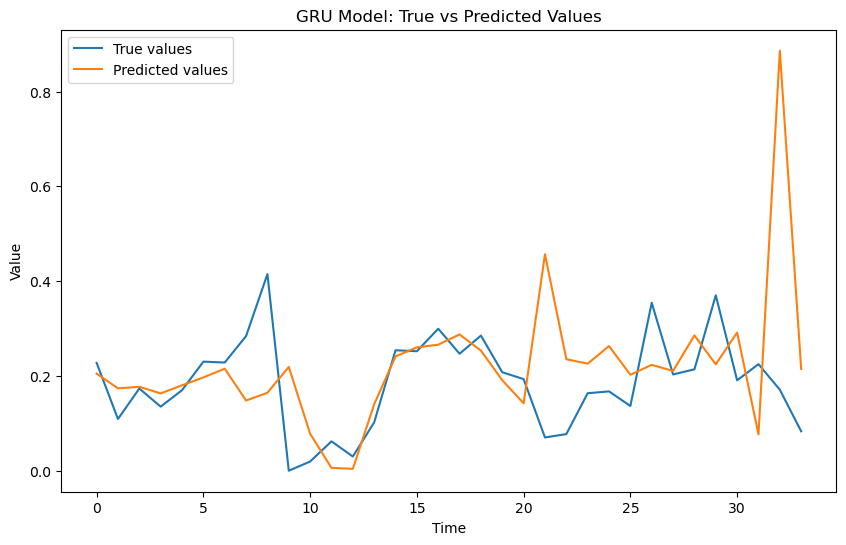

In [47]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="True values")
plt.plot(predicted_values_gru, label="Predicted values")
plt.title("GRU Model: True vs Predicted Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [48]:
# Stop the SparkSession
#spark.stop()